# Visually Comparing Climate Models

In this notebook, I will be comparing two climate reanalysis models:

* NCEP-DOE Reanalysis 2: Surface
* ERA5

I will be looking at the following variables:

* Surface Pressure
* Mean Sea Level Pressure
* Total Column Water

The idea is simple: these two models should have very similar properties. I will be trying to user RBIG in order to assess how similar these models are. I'll be looking at the following IT measures

* Entropy
* Total Correlation
* Mutual Information

If these climate models are that similar, then they should exhibit similar IT measures.

## Data - Climate Models

In [19]:
import os, sys
cwd = os.getcwd()
source_path = f"{cwd}/../../"
sys.path.insert(0, f'{source_path}')

# Import RBIG Helper
from src.models.train_models import run_rbig_models

# ESDC tools
sys.path.insert(0, f'/home/emmanuel/code/py_esdc')
from esdc.preprocessing import normalize_temporal

import cdsapi
from zipfile import ZipFile
import pandas as pd
import xarray as xr
from tqdm import tqdm
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use(['seaborn-poster', 'seaborn-dark'])

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
plt.style.available

['seaborn-dark-palette',
 'classic',
 'ggplot',
 'seaborn-dark',
 'seaborn-pastel',
 'seaborn-bright',
 'seaborn-deep',
 'tableau-colorblind10',
 'seaborn-talk',
 'fast',
 'seaborn-ticks',
 'seaborn-white',
 'bmh',
 'fivethirtyeight',
 'seaborn-muted',
 '_classic_test',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-poster',
 'seaborn',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-paper',
 'seaborn-colorblind',
 'seaborn-notebook',
 'Solarize_Light2']

In [21]:
data_path = f"/home/emmanuel/projects/2020_rbig_rs/data/climate/raw/"
results_path = f"/home/emmanuel/projects/2020_rbig_rs/data/climate/results/"
fig_path = f"/home/emmanuel/projects/2020_rbig_rs/reports/figures/climate/"

## Figures

In [22]:
from typing import Optional

class PlotResults:
    def __init__(self, filename: str, variable: str='sp', measure: str='tc'):
        self.filename =filename
        self.variable = variable
        self.measure = measure
        self.fig_path = '/home/emmanuel/projects/2020_rbig_rs/reports/figures/climate/'
        
        # load dataframe
        self.load_dataframe(filename)
        
    def load_dataframe(self, filename: Optional[str]=None):
        if filename is None:
            filename = self.filename
            
        # load dataframe
        self.results = pd.read_csv(f"{filename}")
        
    def plot_entropy(self):
        
        # plot the entropy
        fig, ax = plt.subplots( figsize=(15, 5))

        sns.lineplot(ax=ax, x='year', y='h', hue='model', data=self.results, linewidth=4,)
        # sns.lineplot(ax=ax, x='nm_features', y='I', data=ndvi_df, label=label_main, linewidth=4,)
        ax.set_xlabel('Years', fontsize=20)
        ax.set_ylabel('Entropy', fontsize=20)
        # ax.set_ylim([34, 38])
        plt.legend(fontsize=20)
        plt.show()
        fig.savefig(f"{self.fig_path}{self.variable}_h.png")
        
        return None
    
    def plot_total_correlation(self):
        # plot the entropy
        fig, ax = plt.subplots( figsize=(15, 5))

        sns.lineplot(ax=ax, x='year', y='tc', hue='model', data=self.results, linewidth=4,)
        # sns.lineplot(ax=ax, x='nm_features', y='I', data=ndvi_df, label=label_main, linewidth=4,)
        ax.set_xlabel('Years', fontsize=20)
        ax.set_ylabel('Total Correlation', fontsize=20)
        plt.legend(fontsize=20)
        plt.show()
        fig.savefig(f"{self.fig_path}{self.variable}_tc.png")
        
        return None
    
    def plot_mutual_information(self):
        # plot the mutual information
        fig, ax = plt.subplots( figsize=(15, 5))

        sns.lineplot(ax=ax, x='year', y='mi', data=self.results, linewidth=4,)
        # sns.lineplot(ax=ax, x='nm_features', y='I', data=ndvi_df, label=label_main, linewidth=4,)
        ax.set_xlabel('Years', fontsize=20)
        ax.set_ylabel('Mutual Information', fontsize=20)
        # plt.legend(fontsize=20)
        plt.show()
        fig.savefig(f"{self.fig_path}{self.variable}_mi.png")
        
        return None

## Results

### Mean Sea Level Pressure

#### CMIP5 vs ERA5

In [23]:
variable = 'mslp_era_cmip'

filename = f"{results_path}{variable}.csv"

plotter = PlotResults(filename)

In [24]:
plotter.results = plotter.results[plotter.results['year'] < 2018]

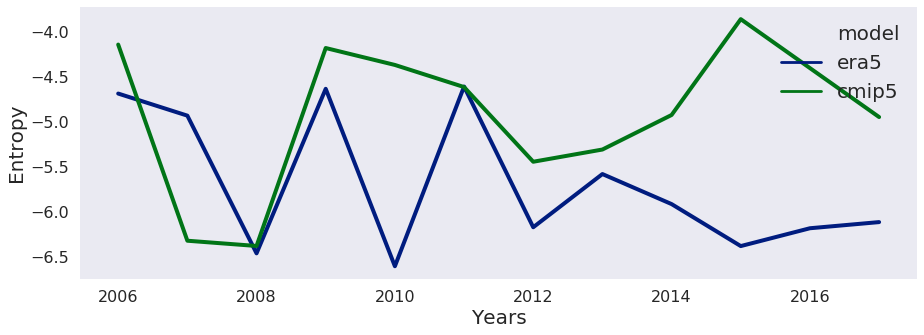

In [25]:
plotter.plot_entropy()

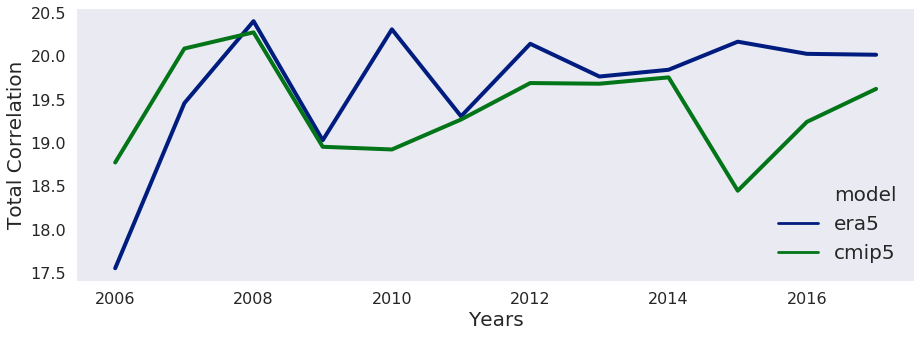

In [27]:
plotter.plot_total_correlation()

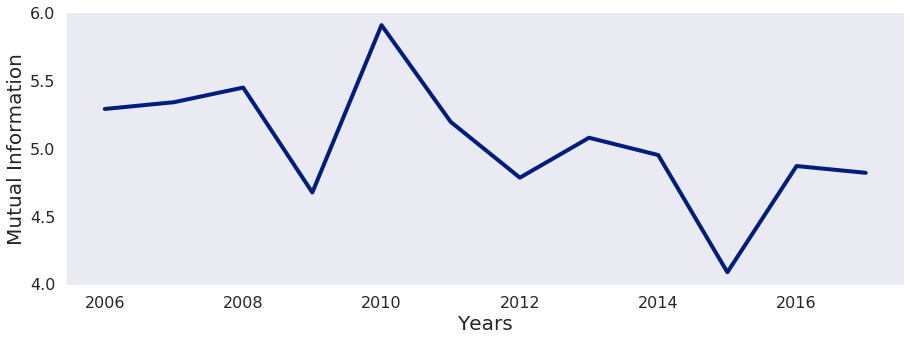

In [28]:
plotter.plot_mutual_information()

#### CMIP5 vs NCEP

In [29]:
variable = 'mslp_ncep_cmip'

filename = f"{results_path}{variable}.csv"

# plotter = PlotResults(filename)

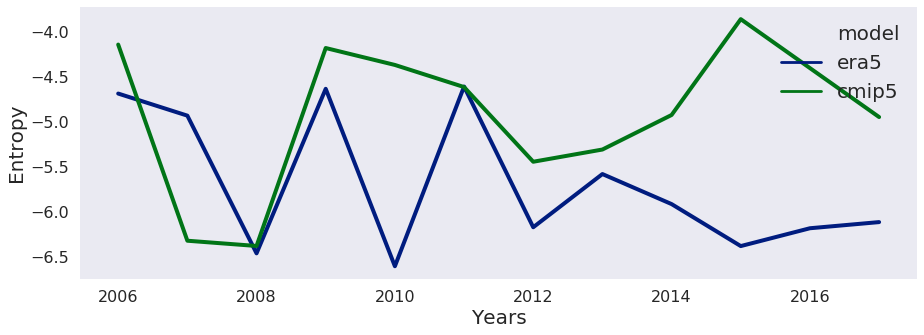

In [30]:
plotter.plot_entropy()

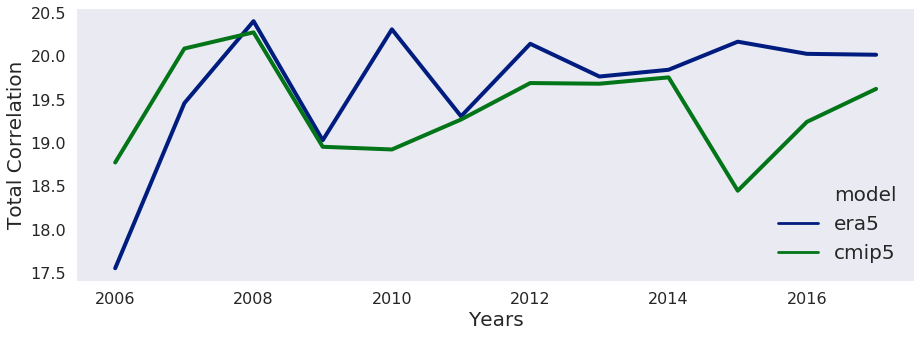

In [31]:
plotter.plot_total_correlation()

#### NCEP vs ERA5

In [32]:
variable = 'mslp_ncep_era'

filename = f"{results_path}{variable}.csv"

plotter = PlotResults(filename)

In [33]:
plotter.results = plotter.results[plotter.results['year'] < 2017]  

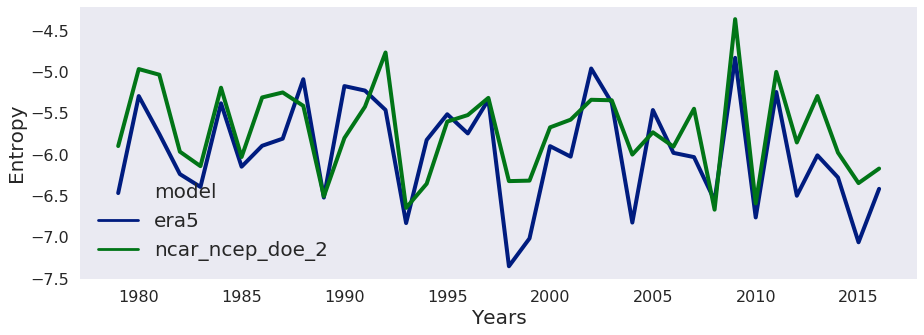

In [34]:
plotter.plot_entropy()

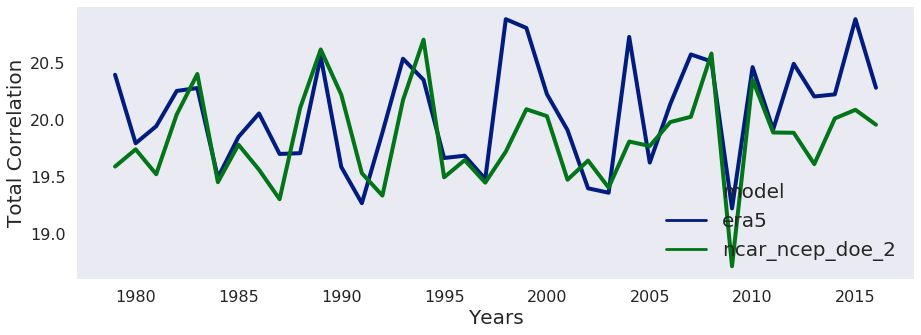

In [35]:
plotter.plot_total_correlation()

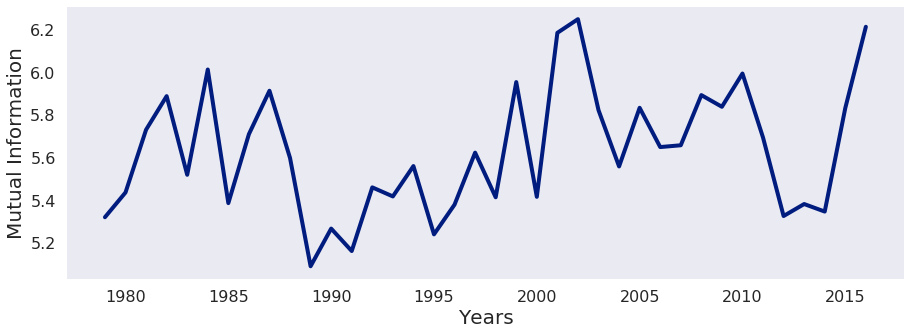

In [36]:
plotter.plot_mutual_information()

### Surface Pressure

In [37]:
variable = 'sp'

filename = f"{results_path}{variable}.csv"

plotter = PlotResults(filename)

In [38]:
plotter.results = plotter.results[plotter.results['year'] < 2017]  

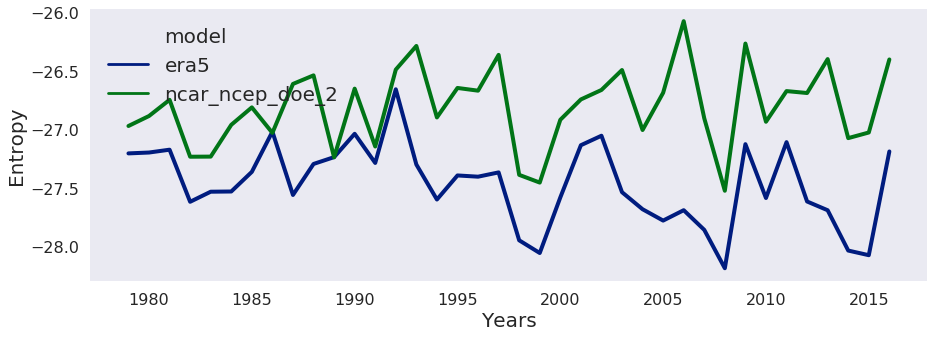

In [39]:

plotter.plot_entropy()

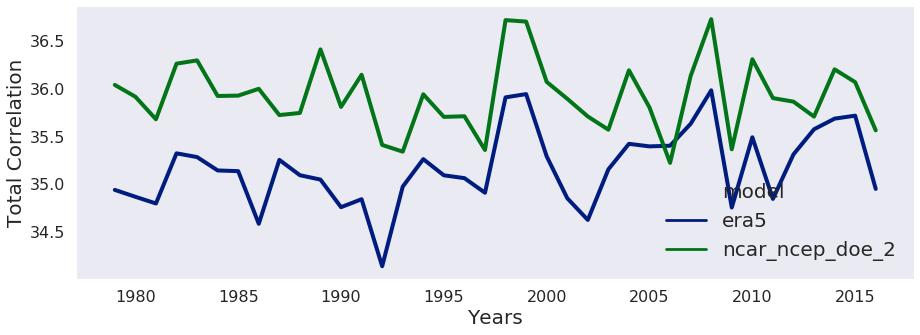

In [40]:
plotter.plot_total_correlation()

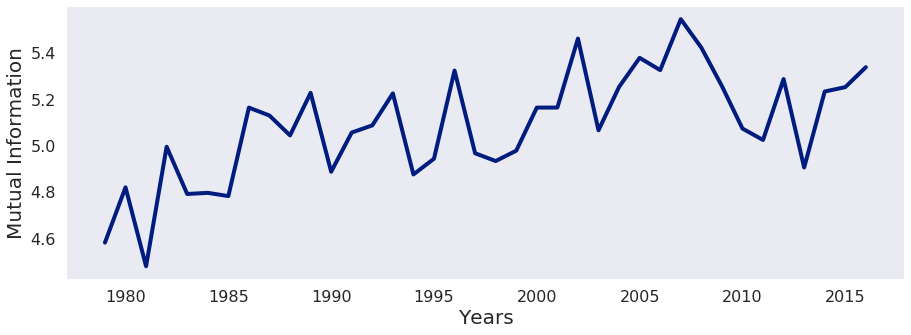

In [41]:
plotter.plot_mutual_information()